### 3 OPT Algorithm

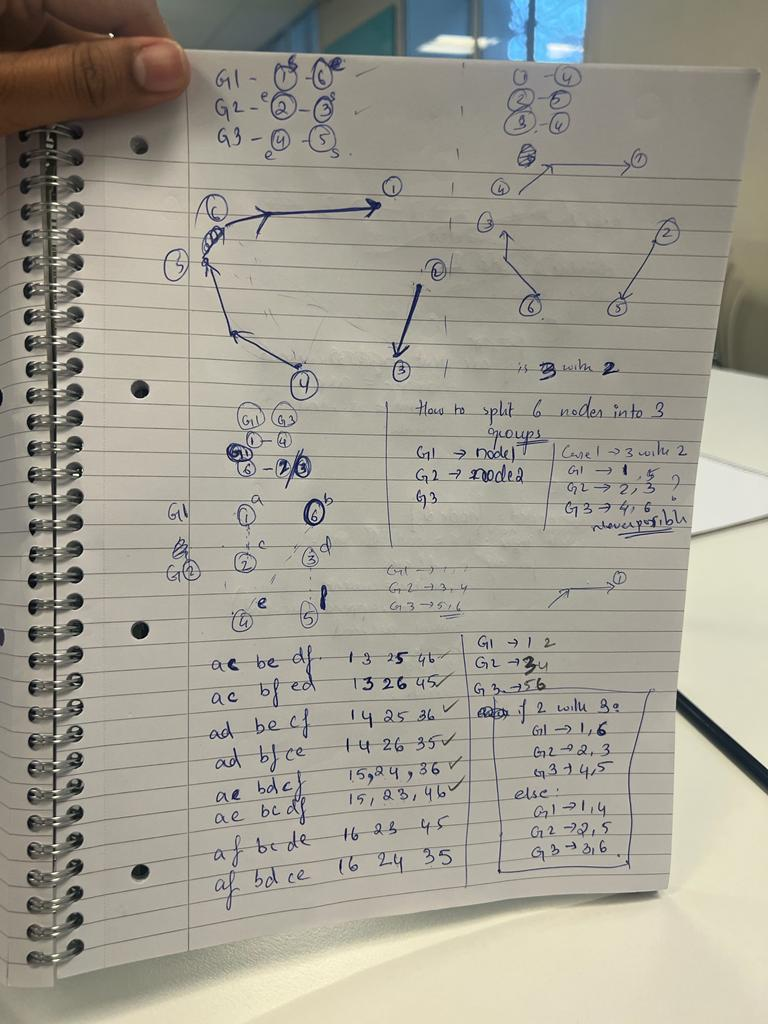

27591.62 0
0 12 65 93 15 86 58 97 33 27 31 60 1 10 78 67 75 68 98 41 48 45 59 81 56 42 95 73 94 36 30 46 63 85 82 6 61 49 23 53 89 9 2 50 18 34 76 64 52 22 8 62 90 26 28 14 29 38 79 16 13 80 69 17 96 4 84 51 91 55 70 3 72 24 19 71 57 11 40 32 25 99 43 44 21 66 74 35 39 88 20 83 87 77 47 54 37 5 7 92


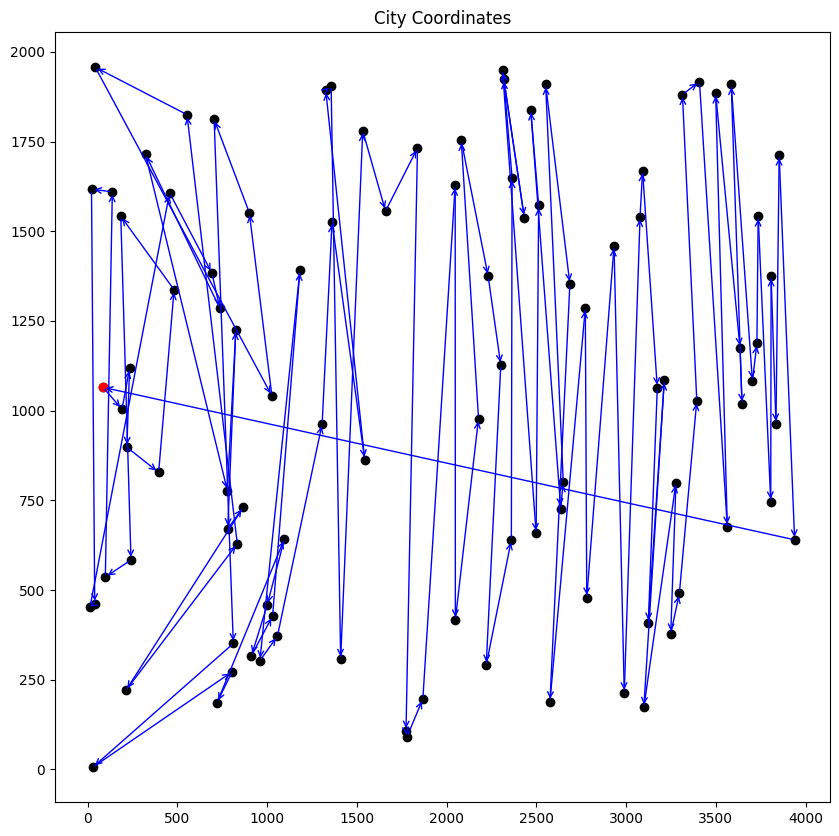

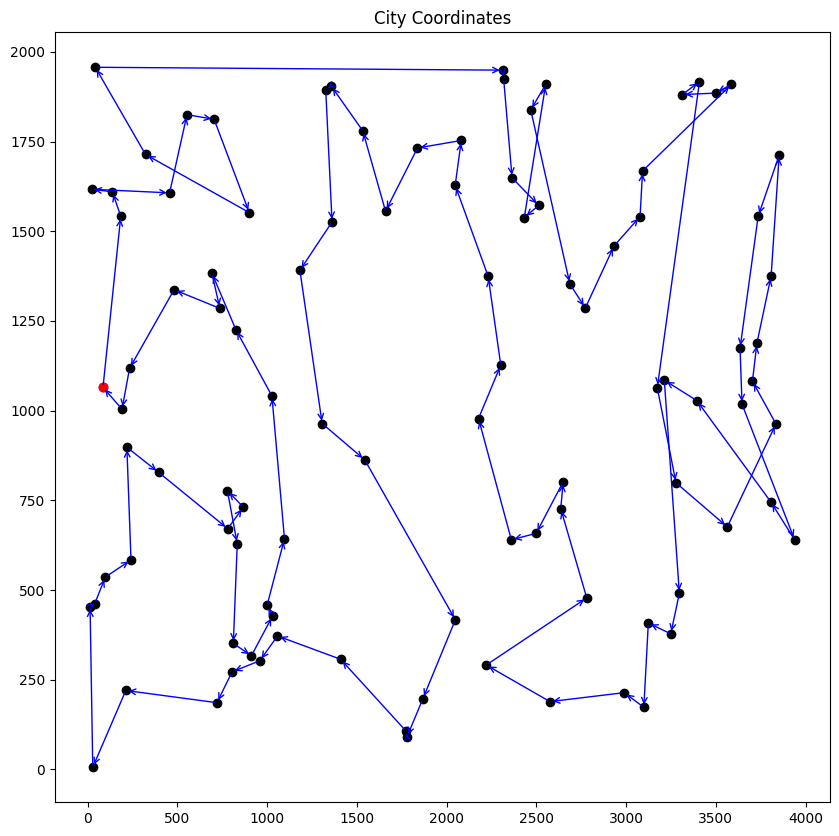

In [427]:
import math
from collections import namedtuple
import random
import numpy as np
from matplotlib import pyplot as plt

Point = namedtuple("Point", ['x', 'y'])


# def length(point1, point2):
#     return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)


class node:
    def __init__(self, x, y, city_name):
        self.x = x
        self.y = y
        self.city_name = city_name

# def length(point1, point2):
#     return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)

# class arc:
#     def __init__(self, start, end):
#         self.start = start
#         self.end = end
#         self.length = length(start,end)

class TSP:
    def __init__(self,input_data):
        self.input_data=input_data
        self.cities = []
        self.tour_length = 0
        self.route = [0]
        self.arcs=[]
        self.output=''
        self.swapped =[]

        #populating the tsp with city data 
        lines = input_data.split('\n')
        self.nodeCount = int(lines[0])     
        for i in range(1, self.nodeCount+1):
            line = lines[i]
            parts = line.split()
            self.add_city(node(float(parts[0]), float(parts[1]), i-1))

        self.dist_matrix=self.distance_matrix()

    def route_find(self):
        self.route = [0]
        arcs = 0 
        current = 0
        while True:
            for arc in self.arcs:
                if arc.start.city_name == current:
                    self.route.append(arc.end.city_name)
                    current = arc.end.city_name
                    arcs +=1
                    break 
            if arcs == self.nodeCount:
                break
        # print (self.route)
        return 0


    def add_city(self,node):
        self.cities.append(node)

    def length(self, point1, point2):
        return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)

    #p(n) =0 
    def pdf(self, n, x):
        return ((-2/(n**2))*x) + (2/n)

    # p(n/4)=0
    def pdf2(self, n, x):
        return max(0,((-32/(n**2))*x) + (8/n))
        

    def random_arc(self,pending_arcs):
        # n = self.nodeCount
        n = pending_arcs
        u1 = math.ceil(n * random.random()) #discrete uniform random variable from 0-n
        p_x = self.pdf2(n, u1)
        # print(1/n, p_x)

        # envelope function -  f(x) =  1/n, c =  2
        while True:
            u1 = math.ceil(n * random.random()) #discrete uniform random variable from 0-n
            p_x = self.pdf(n, u1)
            # p_x = self.pdf2(n, u1)
            u2 = random.random()
            if u2 <= ((p_x*n)/8):
                return u1
                

    def distance_matrix(self):
        output= np.zeros((len(self.cities),len(self.cities)))
        num_rows, num_cols = output.shape
        for row in range(num_rows):
            for col in range(num_cols):
                if row==col:continue
                output[row][col]=self.length(self.cities[row], self.cities[col])
        return output

    def compute_tour_length(self):
        for arc in self.arcs:
            self.tour_length +=arc.length        
        return self.tour_length

    def verify_route(self):
        current = self.arcs[0]
        start = current.start
        tour = 1
        while True:
            for each_arc in self.arcs:
                if current == each_arc: continue
                if each_arc.end == start: return tour
                if current.end == each_arc.start:
                    tour+=1
                    current = each_arc
                    break 
            

    def remove_3bad_arcs(self,worst=0):
        temp = sorted(self.arcs, key=lambda x: x.length, reverse=True)
        worst_arc = temp[worst]
        # print (worst_arc.start.city_name, worst_arc.end.city_name)
        # worst_arc = self.arcs[worst]
        second_arc = None
        third_arc = None
        # print (worst_arc.start.city_name, worst_arc.end.city_name)

        tabu_cities = [worst_arc.start,worst_arc.end] #list to avoid adjacent arcs
        # print ("length tabu cities - ",len(tabu_cities))
        # print(tabu_cities)
        pending_arcs = self.nodeCount
        if worst != 0:
            while True:
                # ran = self.random_arc()
                # print("Ran - ",ran)
                # print("Len - ", len(temp))
                arc = temp[self.random_arc(pending_arcs)]
                if arc.start in tabu_cities or arc.end in tabu_cities:
                # if worst_arc.start == arc.end or worst_arc.end == arc.start  or worst_arc.start == arc.start or worst_arc.end == arc.end:
                    continue
                else:
                    if second_arc == None:
                        second_arc = arc
                        tabu_cities.append(arc.start)
                        tabu_cities.append(arc.end)
                        temp.remove(second_arc)
                        pending_arcs -=1
                    else:
                        third_arc = arc
                        break
        else:
            temp.remove(worst_arc)
            tabu_cities = [worst_arc.start,worst_arc.end]
            # print("temp length -",len(temp))
            # print("arc length -",len(self.arcs))
            for arc in temp:
                # if worst_arc.start == arc.end or worst_arc.end == arc.start  or worst_arc.start == arc.start or worst_arc.end == arc.end:
                if arc.start in tabu_cities or arc.end in tabu_cities:
                    continue
                else:
                    if second_arc is None:
                        second_arc = arc
                        tabu_cities.append(arc.start)
                        tabu_cities.append(arc.end)
                        
                    else:
                        third_arc = arc
                        break
        self.arcs.remove(worst_arc)
        self.arcs.remove(second_arc)
        self.arcs.remove(third_arc)
        # print ("arcs ct - ",len(self.arcs))
        return worst_arc.start, worst_arc.end, second_arc.start, second_arc.end, third_arc.start, third_arc.end


                
                    
    def add_3new_arcs(self, node1, node2, node3, node4, node5, node6):


        connected = [node2]
        current = node2
        while True:
            inspected_arcs = 0
            for each_arc in self.arcs:
                inspected_arcs += 1
                if each_arc.start == current:
                    connected.append(each_arc.end)
                    current = each_arc.end
                    break
            if inspected_arcs == self.nodeCount - 3:
                break 

        #Dividing the 6 nodes into 3 disconnected graphs
        #node1 and node2 cannot be a part of the same subgraph, same as other arcs we just removed
        #we can finalise the 3 subgraphs based on when node 3 is
        if node3 in connected:
            G1 = [node1, node6]
            G2 = [node2, node3]
            G3 = [node4, node5]
        else:
            G1 = [node1, node4]
            G2 = [node2, node5]
            G3 = [node3, node6]
        
        

        old_len = arc(node1,node2).length + arc(node3, node4).length + arc(node5, node6).length
        old_arcs = [arc(node1,node2),arc(node3, node4),arc(node5, node6)]
        #Recombinations
        potential_reconnections = [[arc(G1[0],G2[0]), arc(G1[1],G3[0]), arc(G2[1],G3[1])], #done
                                  [arc(G1[0],G2[0]), arc(G1[1],G3[1]), arc(G2[1],G3[0])], #done
                                  [arc(G1[0],G2[1]), arc(G1[1],G3[0]), arc(G2[0],G3[1])], #done
                                  [arc(G1[0],G2[1]), arc(G1[1],G3[1]), arc(G2[0],G3[0])], #done
                                  [arc(G1[0],G3[0]), arc(G1[1],G2[1]), arc(G2[0],G3[1])], #done
                                  [arc(G1[0],G3[0]), arc(G1[1],G2[0]), arc(G2[1],G3[1])], #done
                                  [arc(G1[0],G3[1]), arc(G1[1],G2[0]), arc(G2[1],G3[0])], #done
                                  [arc(G1[0],G3[1]), arc(G1[1],G2[1]), arc(G2[0],G3[0])]] #done

        min_len = old_len
        new_arcs = old_arcs
        improvement = 0
        k=-1
        for reconnection in potential_reconnections:
            new_len = 0
            for each_arc in reconnection:
                new_len += each_arc.length
            if new_len < min_len:
                new_arcs = reconnection
                min_len = new_len
                improvement = 1
        k=potential_reconnections.index(reconnection)

        # for reconnection in potential_reconnections:
        #     for each_arc in reconnection:
        #         self.arcs.append(each_arc)
        #     self.visualise_solution()

        #     for each_arc in reconnection:
        #         self.arcs.remove(each_arc)
            # self.visualise_solution()
            
                

        for each_arc in new_arcs:
            self.arcs.append(each_arc)

        # print("Loop",len(self.arcs))

        #Route fix based on first Arc
        self.route_fix(new_arcs[0])
        # self.visualise_solution()
        # print(self.verify_route())


        self.tour_length =0
        self.compute_tour_length()


        return improvement


        
    # def route_fix(self, new_arc):

    #     current = new_arc
    #     flag = True
    #     while flag == True:
    #         no_conflict = 1 #no conflicts with itself
    #         for arc in self.arcs:
    #             if current == arc: continue
    #             if arc.start == current.start or arc.end == current.end:
    #                 # self.swapped.append(arc)
    #                 arc.start, arc.end = arc.end, arc.start
    #                 current = arc
    #                 break
    #             else:
    #                 no_conflict += 1
    #         if no_conflict == self.nodeCount:
    #             flag = False

    # def route_fix(self, new_arc):

    #     current = new_arc
    #     while flag == True:
    #         no_conflict = 1 #no conflicts with itself
    #         for each_arc in range(self.nodeCount):
    #             if current == self.arcs[each_arc]: continue
    #             if self.arcs[each_arc].start == current.start or self.arcs[each_arc].end == current.end:
    #                 # self.swapped.append(arc)
    #                 self.arcs[each_arc].start, self.arcs[each_arc].end = self.arcs[each_arc].end, self.arcs[each_arc].start
    #                 current = self.arcs[each_arc]
    #                 break
    #             else:
    #                 no_conflict += 1
    #         if no_conflict == self.nodeCount:
    #             flag = False

    def route_fix(self, new_arc):

        current = new_arc
        pending_arcs = self.nodeCount - 1
        while True:
            for each_arc in self.arcs:
                if each_arc == current : 
                    # print("Hi")
                    continue

                elif each_arc.end == current.end:
                    pending_arcs -= 1
                    each_arc.start, each_arc.end = each_arc.end, each_arc.start
                    current = each_arc
                    break
                    
                elif each_arc.start == current.end:
                    pending_arcs -= 1
                    current = each_arc
                    break 

            # print ("pending arcs - ", pending_arcs)
            if pending_arcs == -20:
                break
                    


    def visualise_solution(self):
        self.plot_cities()
        arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor='blue')
        
        for arc in self.arcs:
            plt.annotate('', xy=[arc.end.x, arc.end.y], xytext=[arc.start.x, arc.start.y], arrowprops=arrowprops)

        pass

    def plot_cities(self):
        plt.figure(figsize=(10,10))
        # plt.figure(figsize=(5,5))
        plt.title("City Coordinates")
        x,y=[],[]
        # y=[]
        for city in self.cities:
            x.append(city.x)
            y.append(city.y)
        plt.scatter(np.array(x),np.array(y),c='black')
        plt.scatter(np.array(x[0]),np.array(y[0]),c='red') # Depot
               
    
    def initial_solution_greedy(self):

        #greedy algorithm
        pending_visit= [i for i in range(1,self.nodeCount)]
        current_city = 0
        while len(pending_visit)>0:
            next_city=self.dist_matrix[current_city].tolist().index(sorted(self.dist_matrix[current_city])[1]) #minimum distance excluding distance to itself 
            self.dist_matrix[current_city][next_city]=1000000000000000
            self.route.append(next_city)
            pending_visit.remove(next_city)
        self.route.append(0) #returning to first city
        edges = list(zip(self.route[:-1:1], self.route[1::1]))
        for edge in edges:
            self.arcs.append(arc(self.cities[edge[0]],self.cities[edge[1]]))
        obj=self.compute_tour_length()

        self.output = '%.2f' % obj + ' ' + str(0) + '\n'
        self.output += ' '.join(map(str, self.route[:-1]))
        return self.output


    def two_opt(self):
        worst = 0 #the arc to be removed first, 0 represents the first element of the sorted(descending) list of arc costs
        for i in range(10000):
            node1, node2, node3, node4 = self.remove_bad_arcs(worst)
            improvement = self.add_new_arcs(node1, node2, node3, node4)
            if improvement == 0:
                worst = self.random_arc(self.nodeCount)
                
        self.route_find()

        self.output=''
        obj=self.tour_length
        self.output = '%.2f' % obj + ' ' + str(0) + '\n'
        self.output += ' '.join(map(str, self.route[:-1]))
        print(self.output)

    def three_opt(self):
        worst = 0 #the arc to be removed first, 0 represents the first element of the sorted(descending) list of arc costs
        strategy = 0
        # worst = self.random_arc(self.nodeCount)
        for i in range(1000):
            # self.swapped =[]
            node1, node2, node3, node4, node5, node6 = self.remove_3bad_arcs(worst)
            improvement = self.add_3new_arcs(node1, node2, node3, node4, node5, node6)
            if improvement == 0:
                strategy = 1
            if strategy == 1: # if we reach an iteration with no improvement then we pick arcs randomly only
                worst = self.random_arc(self.nodeCount)
            # worst = self.random_arc(self.nodeCount)

        self.output=''
        obj=self.tour_length
        self.output = '%.2f' % obj + ' ' + str(0) + '\n'
        self.output += ' '.join(map(str, self.route[:-1]))
        print(self.output)
        

    
class arc(TSP):
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.length = self.length(start,end)
    



if __name__ == '__main__':
   
    # file_location = ".\\data\\tsp_10_1.txt"
    # file_location = ".\\data\\tsp_51_1"      #MILP - 10 points
    file_location = ".\\data\\tsp_100_3"     #200000 iterations - 2OPT
    # file_location = ".\\data\\tsp_200_2"   #10000 iterations - 3OPT
    # file_location = ".\\data\\tsp_574_1"    #1000000 iterations - 43160.17 - 2 OPT
    # file_location = ".\\data\\tsp_33810_1"    #1000000 iterations - 43160.17
    with open(file_location, 'r') as input_data_file:
        input_data = input_data_file.read()

    tsp = TSP(input_data)
    initial_solution = tsp.initial_solution_greedy()
    tsp.visualise_solution()
    if tsp.nodeCount >600:
        print (initial_solution)
    else:
        tsp.three_opt()

        # tsp.two_opt()
        tsp.visualise_solution()




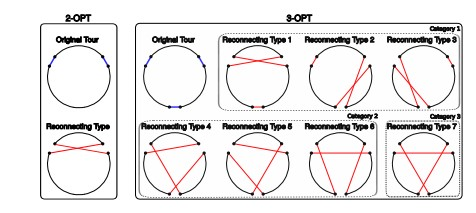

## 2OPT & 3OPT Combined 

472.04 0
0 33 5 32 22 48 2 47 26 1 31 17 6 49 28 25 27 20 39 36 45 9 10 21 50 37 43 41 3 12 30 24 29 34 46 42 23 11 38 8 4 35 40 18 15 44 16 19 7 13 14


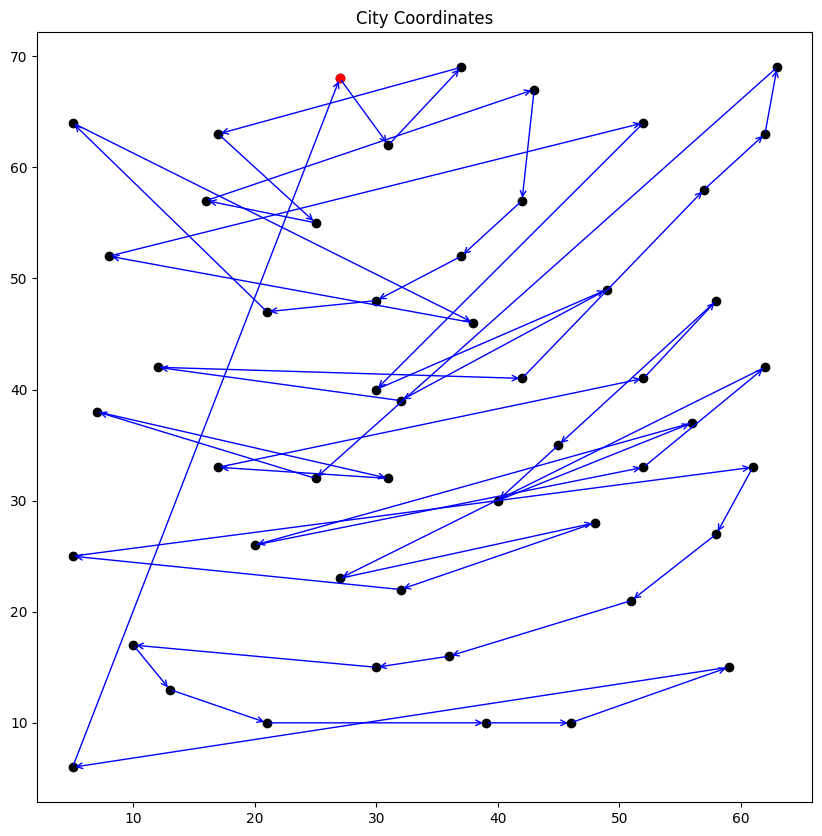

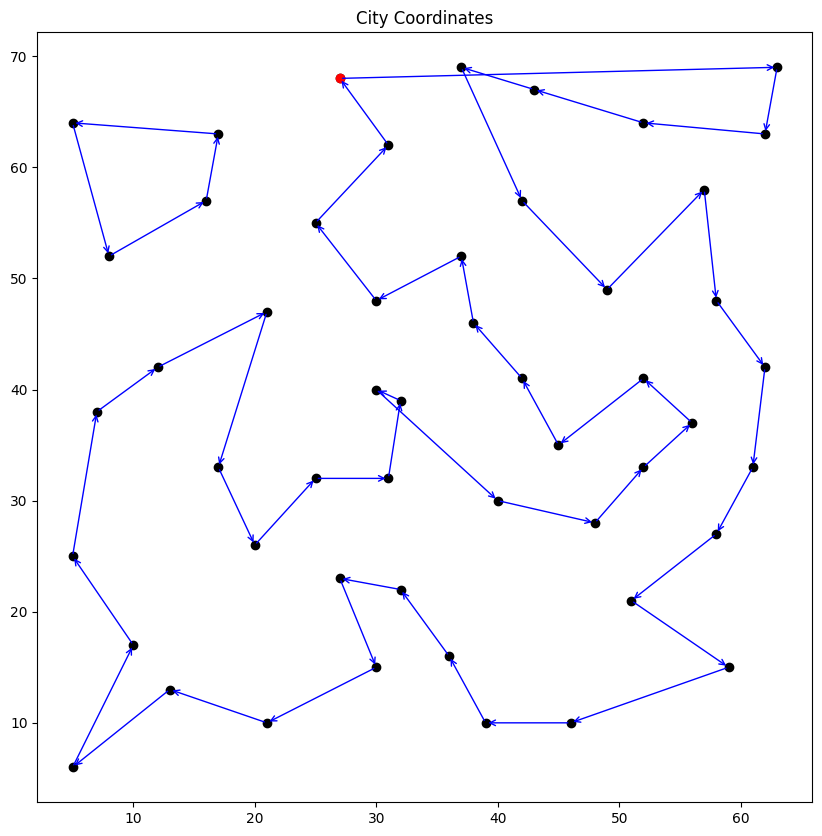

In [236]:
import math
from collections import namedtuple
import random
import numpy as np
from matplotlib import pyplot as plt

Point = namedtuple("Point", ['x', 'y'])


# def length(point1, point2):
#     return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)


class node:
    def __init__(self, x, y, city_name):
        self.x = x
        self.y = y
        self.city_name = city_name

# def length(point1, point2):
#     return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)

# class arc:
#     def __init__(self, start, end):
#         self.start = start
#         self.end = end
#         self.length = length(start,end)

class TSP:
    def __init__(self,input_data):
        self.input_data=input_data
        self.cities = []
        self.tour_length = 0
        self.route = [0]
        self.arcs=[]
        self.output=''

        #populating the tsp with city data 
        lines = input_data.split('\n')
        self.nodeCount = int(lines[0])     
        for i in range(1, self.nodeCount+1):
            line = lines[i]
            parts = line.split()
            self.add_city(node(float(parts[0]), float(parts[1]), i-1))

        self.dist_matrix=self.distance_matrix()

    def route_find(self):
        self.route = [0]
        arcs = 0 
        current = 0
        while True:
            for arc in self.arcs:
                if arc.start.city_name == current:
                    self.route.append(arc.end.city_name)
                    current = arc.end.city_name
                    arcs +=1
                    break 
            if arcs == self.nodeCount:
                break
        # print (self.route)
        return 0


    def add_city(self,node):
        self.cities.append(node)

    def length(self, point1, point2):
        return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)

    #p(n) =0 
    def pdf(self, n, x):
        return ((-2/(n**2))*x) + (2/n)

    # p(n/4)=0
    def pdf2(self, n, x):
        return max(0,((-32/(n**2))*x) + (8/n))
        

    def random_arc(self,pending_arcs):
        # n = self.nodeCount
        n = pending_arcs
        u1 = math.ceil(n * random.random()) #discrete uniform random variable from 0-n
        p_x = self.pdf2(n, u1)
        # print(1/n, p_x)

        # envelope function -  f(x) =  1/n, c =  2
        while True:
            u1 = math.ceil(n * random.random()) #discrete uniform random variable from 0-n
            p_x = self.pdf(n, u1)
            # p_x = self.pdf2(n, u1)
            u2 = random.random()
            if u2 <= ((p_x*n)/8):
                return u1
                

    def distance_matrix(self):
        output= np.zeros((len(self.cities),len(self.cities)))
        num_rows, num_cols = output.shape
        for row in range(num_rows):
            for col in range(num_cols):
                if row==col:continue
                output[row][col]=self.length(self.cities[row], self.cities[col])
        return output

    def compute_tour_length(self):
        for arc in self.arcs:
            self.tour_length +=arc.length        
        return self.tour_length
        
    #2OPT
    def remove_2bad_arcs(self,worst=0):
        temp = sorted(self.arcs, key=lambda x: x.length, reverse=True)
        worst_arc = temp[worst]
        # print (worst_arc.start.city_name, worst_arc.end.city_name)
        
        if worst != 0:
            while True:
                arc = temp[self.random_arc(self.nodeCount)]
                if worst_arc.start == arc.end or worst_arc.end == arc.start  or worst_arc.start == arc.start or worst_arc.end == arc.end:
                    continue
                else:
                    second_arc = arc
                    break
        else:
            temp.remove(worst_arc)
            for arc in temp:
                if worst_arc.start == arc.end or worst_arc.end == arc.start  or worst_arc.start == arc.start or worst_arc.end == arc.end:
                    continue
                else:
                    second_arc = arc
                    break
        self.arcs.remove(worst_arc)
        self.arcs.remove(second_arc)
        return worst_arc.start, worst_arc.end, second_arc.start, second_arc.end
            
    #3OPT
    def remove_3bad_arcs(self,worst=0):
        temp = sorted(self.arcs, key=lambda x: x.length, reverse=True)
        worst_arc = temp[worst]
        # worst_arc = self.arcs[worst]
        second_arc = None
        third_arc = None
        # print (worst_arc.start.city_name, worst_arc.end.city_name)

        tabu_cities = [worst_arc.start,worst_arc.end] #list to avoid adjacent arcs
        pending_arcs = self.nodeCount
        if worst != 0:
            while True:
                # ran = self.random_arc()
                # print("Ran - ",ran)
                # print("Len - ", len(temp))
                arc = temp[self.random_arc(pending_arcs)]
                if arc.start in tabu_cities or arc.end in tabu_cities:
                # if worst_arc.start == arc.end or worst_arc.end == arc.start  or worst_arc.start == arc.start or worst_arc.end == arc.end:
                    continue
                else:
                    if second_arc == None:
                        second_arc = arc
                        tabu_cities.append(arc.start)
                        tabu_cities.append(arc.end)
                        temp.remove(second_arc)
                        pending_arcs -=1
                    else:
                        third_arc = arc
                        break
        else:
            temp.remove(worst_arc)
            for arc in temp:
                if worst_arc.start == arc.end or worst_arc.end == arc.start  or worst_arc.start == arc.start or worst_arc.end == arc.end:
                    continue
                else:
                    if second_arc == None:
                        second_arc = arc
                    else:
                        third_arc = arc
                        break
        self.arcs.remove(worst_arc)
        self.arcs.remove(second_arc)
        self.arcs.remove(third_arc)
        return worst_arc.start, worst_arc.end, second_arc.start, second_arc.end, third_arc.start, third_arc.end


    #2OPT
    def add_2new_arcs(self, node1, node2, node3, node4):
        old = self.tour_length
        new = arc(node1,node3).length + arc(node2, node4).length
        for edge in self.arcs:
            new+=edge.length 
        # print ("Old - ", old)
        # print ("New - ", new)
        if new < old:
            self.arcs.append(arc(node1,node3))
            self.arcs.append(arc(node2, node4))
            # self.arcs.append(arc(node3,node1))
            # self.arcs.append(arc(node4, node2))
            self.route_fix(arc(node1,node3))
            self.tour_length = new
            return 1 #improvement
        else:
            self.arcs.append(arc(node1,node2))
            self.arcs.append(arc(node3, node4))
            return 0 #no improvement

                
    #3OPT              
    def add_3new_arcs(self, node1, node2, node3, node4, node5, node6):
        
        connected = [node2]
        current = node2
        while True:
            inspected_arcs = 0
            for each_arc in self.arcs:
                inspected_arcs += 1
                if each_arc.start == current:
                    connected.append(each_arc.end)
                    current = each_arc.end
                    break
            if inspected_arcs == self.nodeCount - 3:
                break 

        #Dividing the 6 nodes into 3 disconnected graphs
        #node1 and node2 cannot be a part of the same subgraph, same as other arcs we just removed
        #we can finalise the 3 subgraphs based on when node 3 is
        if node3 in connected:
            G1 = [node1, node6]
            G2 = [node2, node3]
            G3 = [node4, node5]
        else:
            G1 = [node1, node4]
            G2 = [node2, node5]
            G3 = [node3, node6]
        
        

        old_len = arc(node1,node2).length + arc(node3, node4).length + arc(node5, node6).length
        old_arcs = [arc(node1,node2),arc(node3, node4),arc(node5, node6)]
        #Recombinations
        potential_reconnections = [[arc(G1[0],G2[0]), arc(G1[1],G3[0]), arc(G2[1],G3[1])], #done
                                  [arc(G1[0],G2[0]), arc(G1[1],G3[1]), arc(G2[1],G3[0])], #done
                                  [arc(G1[0],G2[1]), arc(G1[1],G3[0]), arc(G2[0],G3[1])], #done
                                  [arc(G1[0],G2[1]), arc(G1[1],G3[1]), arc(G2[0],G3[0])], #done
                                  [arc(G1[0],G3[0]), arc(G1[1],G2[1]), arc(G2[0],G3[1])], #done
                                  [arc(G1[0],G3[0]), arc(G1[1],G2[0]), arc(G2[1],G3[1])], #done
                                  [arc(G1[0],G3[1]), arc(G1[1],G2[0]), arc(G2[1],G3[0])], #done
                                  [arc(G1[0],G3[1]), arc(G1[1],G2[1]), arc(G2[0],G3[0])]] #done

        min_len = old_len
        new_arcs = old_arcs
        improvement = 0
        k=-1
        for reconnection in potential_reconnections:
            new_len = 0
            for each_arc in reconnection:
                new_len += each_arc.length
            if new_len < min_len:
                new_arcs = reconnection
                min_len = new_len
                improvement = 1
        k=potential_reconnections.index(reconnection)

        for each_arc in new_arcs:
            self.arcs.append(each_arc)
        self.route_fix(new_arcs[0])
        self.route_fix(new_arcs[1])
        self.route_fix(new_arcs[2])

        self.tour_length =0
        self.compute_tour_length()


        return improvement


        
    def route_fix(self, new_arc):

        current = new_arc
        flag = True
        while flag == True:
            no_conflict = 1 #no conflicts with itself
            for arc in self.arcs:
                if current == arc: continue
                if arc.start == current.start or arc.end == current.end:
                    arc.start, arc.end = arc.end, arc.start
                    current = arc
                    break
                else:
                    no_conflict += 1
            if no_conflict == self.nodeCount:
                flag = False


    def visualise_solution(self):
        self.plot_cities()
        arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor='blue')
        
        for arc in self.arcs:
            plt.annotate('', xy=[arc.end.x, arc.end.y], xytext=[arc.start.x, arc.start.y], arrowprops=arrowprops)

        pass

    def plot_cities(self):
        plt.figure(figsize=(10,10))
        # plt.figure(figsize=(5,5))
        plt.title("City Coordinates")
        x,y=[],[]
        # y=[]
        for city in self.cities:
            x.append(city.x)
            y.append(city.y)
        plt.scatter(np.array(x),np.array(y),c='black')
        plt.scatter(np.array(x[0]),np.array(y[0]),c='red') # Depot
               
    
    def initial_solution_greedy(self):

        #greedy algorithm
        pending_visit= [i for i in range(1,self.nodeCount)]
        current_city = 0
        while len(pending_visit)>0:
            next_city=self.dist_matrix[current_city].tolist().index(sorted(self.dist_matrix[current_city])[1]) #minimum distance excluding distance to itself 
            self.dist_matrix[current_city][next_city]=1000000000000000
            self.route.append(next_city)
            pending_visit.remove(next_city)
        self.route.append(0) #returning to first city
        edges = list(zip(self.route[:-1:1], self.route[1::1]))
        for edge in edges:
            self.arcs.append(arc(self.cities[edge[0]],self.cities[edge[1]]))
        obj=self.compute_tour_length()

        self.output = '%.2f' % obj + ' ' + str(0) + '\n'
        self.output += ' '.join(map(str, self.route[:-1]))
        return self.output


    def two_opt(self, iterations = 100):
        worst = 0 #the arc to be removed first, 0 represents the first element of the sorted(descending) list of arc costs
        for i in range(iterations):
            node1, node2, node3, node4 = self.remove_2bad_arcs(worst)
            improvement = self.add_2new_arcs(node1, node2, node3, node4)
            if improvement == 0:
                worst = self.random_arc(self.nodeCount)
                
        self.route_find()

        self.output=''
        obj=self.tour_length
        self.output = '%.2f' % obj + ' ' + str(0) + '\n'
        self.output += ' '.join(map(str, self.route[:-1]))
        print(self.output)

    def three_opt(self, iterations = 100):
        worst = 0 #the arc to be removed first, 0 represents the first element of the sorted(descending) list of arc costs
        for i in range(iterations):
            node1, node2, node3, node4, node5, node6 = self.remove_3bad_arcs(worst)
            improvement = self.add_3new_arcs(node1, node2, node3, node4, node5, node6)
            if improvement == 0:
                worst = self.random_arc(self.nodeCount)

        self.output=''
        obj=self.tour_length
        self.output = '%.2f' % obj + ' ' + str(0) + '\n'
        self.output += ' '.join(map(str, self.route[:-1]))
        print(self.output)
        

    
class arc(TSP):
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.length = self.length(start,end)
    



if __name__ == '__main__':
   
    # file_location = ".\\data\\tsp_10_1.txt"
    file_location = ".\\data\\tsp_51_1"      #MILP - 10 points
    # file_location = ".\\data\\tsp_100_3"     #200000 iterations - 2OPT
    # file_location = ".\\data\\tsp_200_2"   #10000 iterations - 3OPT
    # file_location = ".\\data\\tsp_574_1"    #1000000 iterations - 43160.17 - 2 OPT
    # file_location = ".\\data\\tsp_1889_1" 
    # file_location = ".\\data\\tsp_33810_1"    #1000000 iterations - 43160.17
    with open(file_location, 'r') as input_data_file:
        input_data = input_data_file.read()

    tsp = TSP(input_data)
    initial_solution = tsp.initial_solution_greedy()
    tsp.visualise_solution()
    if tsp.nodeCount == 33810:
        print (initial_solution)
    elif tsp.nodeCount == 1889:
        tsp.three_opt(1000)
    elif tsp.nodeCount == 51:
        # tsp.two_opt(1000)
        tsp.three_opt(1000)
        # tsp.two_opt(1000)
        tsp.visualise_solution()


